# Base de dados com mais ações

## Imports

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()

for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

acoes_df

In [ ]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEG', 'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTVS', 'BOVA11.SA': 'IBOV'})
acoes_df

In [ ]:
acoes_df.isnull().sum()

In [ ]:
acoes_df.dropna(inplace=True)
acoes_df.shape

In [8]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

In [ ]:
acoes_df.columns[1:]

In [ ]:
acoes_df.describe()

## Visualização

In [ ]:
sns.histplot(acoes_df['GOL']);

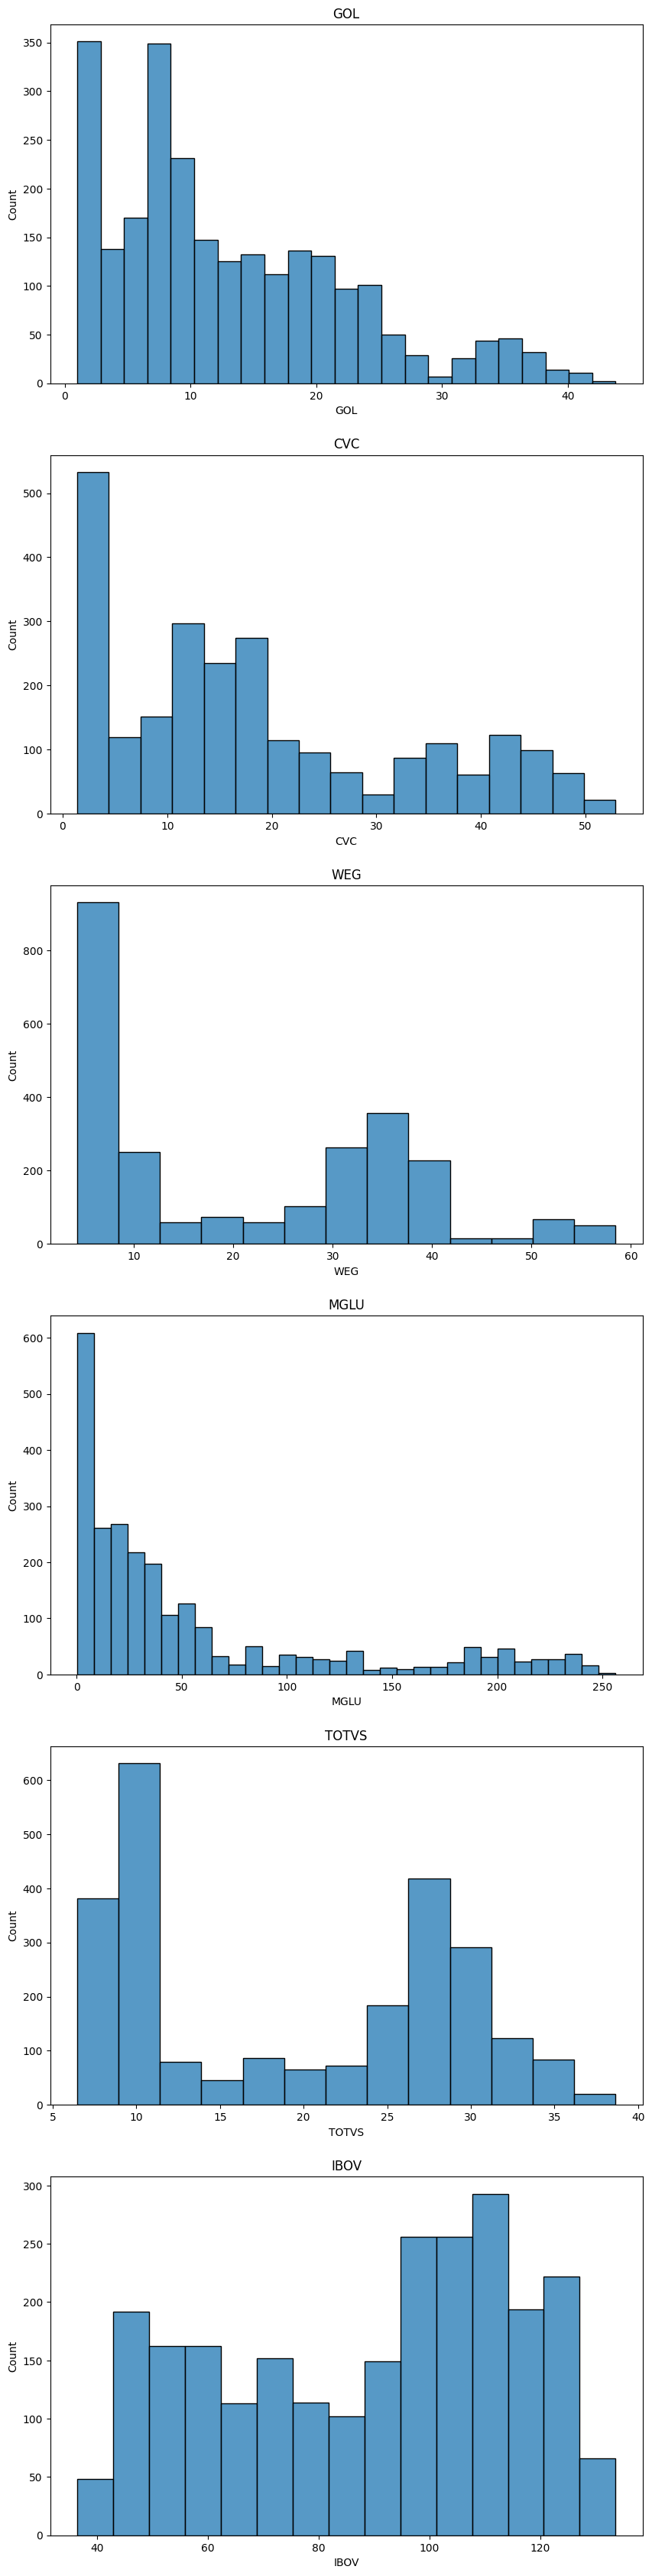

In [21]:
plt.figure(figsize=(10,50))
i = 1

for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7, 1, i + 1)
    sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
    plt.title(acoes_df.columns[i])